<a href="https://colab.research.google.com/drive/1CZDd_zcrZMuMS62GbIKchh1tW0MyZT6n?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install the required packages

In [ ]:
!pip install corner

# Import required packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm,uniform
import corner

# Load Mock data from GitHub

In [ ]:
x=np.array([1,2,3,4,5,6])
y=2+3*x
yerr=y*0.1

# Define Likelihood Function

In [ ]:
def likelihood(theta, x, y, yerr):
    a, b= theta
    model = a+b*x
    return (np.sum(-0.5*((y-model)/yerr)**2-0.5*np.log(2*np.pi*yerr**2)))

# Define Prior Function

In [ ]:
def prior(theta):
    a, b= theta
    if 0.0< a < 4 and 2.0 < b < 5.0:
        return np.log10(1.0 / ((4 - 0.0) * (5.0 - 2.0)))
    return -np.inf

# Define Posterior Function

In [ ]:
def posterior(theta, x, y, yerr):
    lp = prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return (lp + likelihood(theta, x, y, yerr))

# Define Metropolis-Hastings Algorithm Function

In [ ]:
def Metropolis_Hastings(parameter_init, nsteps):
    result = []  # List to store the sampled parameter values
    result.append(parameter_init)  # Add the initial parameter values to the result list
    for t in range(nsteps):  # Iterate over the specified number of steps
        step_var = [0.5, 0.5]  # Variance of the proposal distribution for each parameter
        proposal = norm.rvs(loc=result[-1], scale=step_var)  # Generate a proposal parameter value from a normal distribution
        probability = np.exp(posterior(proposal,x,y,yerr) - posterior(result[-1],x,y,yerr))  # Calculate the acceptance probability
        if (uniform.rvs() < probability):  # Accept the proposal with the acceptance probability
            result.append(proposal)  # Add the proposal to the result list
        else:
            result.append(result[-1])  # Reject the proposal and add the previous parameter value to the result list
    return(result)  # Return the sampled parameter values

# Define Initial Seeds, Number of Steps

In [ ]:
a_ini,b_ini=0.1,2.1
initials=a_ini,b_ini
ndim=2
nsteps=300000

# Run Metropolis-Hastings Algorithm

In [ ]:
result = Metropolis_Hastings(initials, nsteps)
samples_MH=np.array(result)

# Plot the chains

Text(0, 0.5, '$b$')

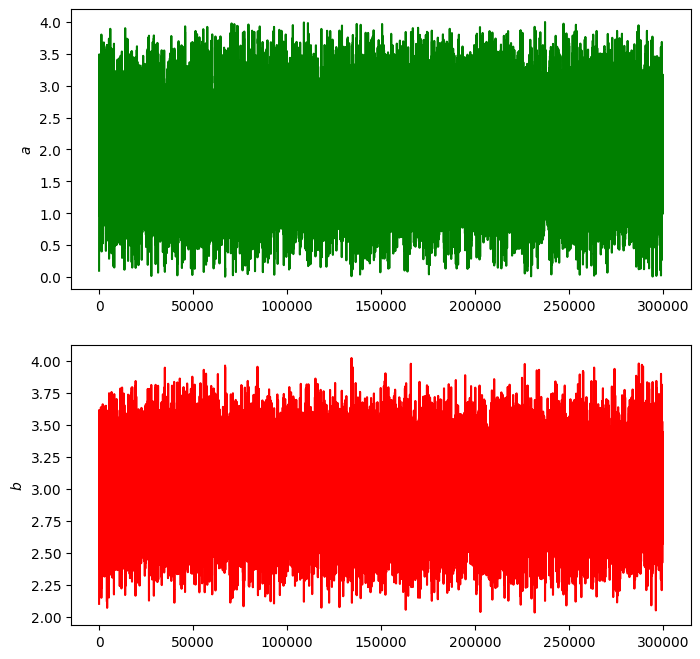

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
samples = samples_MH.T

# Plot the traceplot of H0
axes[0].plot(samples[0], "g")
axes[0].set_ylabel("$a$")

# Plot the traceplot of Om
axes[1].plot(samples[1], "r")
axes[1].set_ylabel("$b$")

# Remove Burn-in Phase

In [ ]:
nburn_in=20000
result_b = result[nburn_in:]
samples_MH_b=np.array(result_b)

# Replot the Chains

Text(0, 0.5, '$b$')

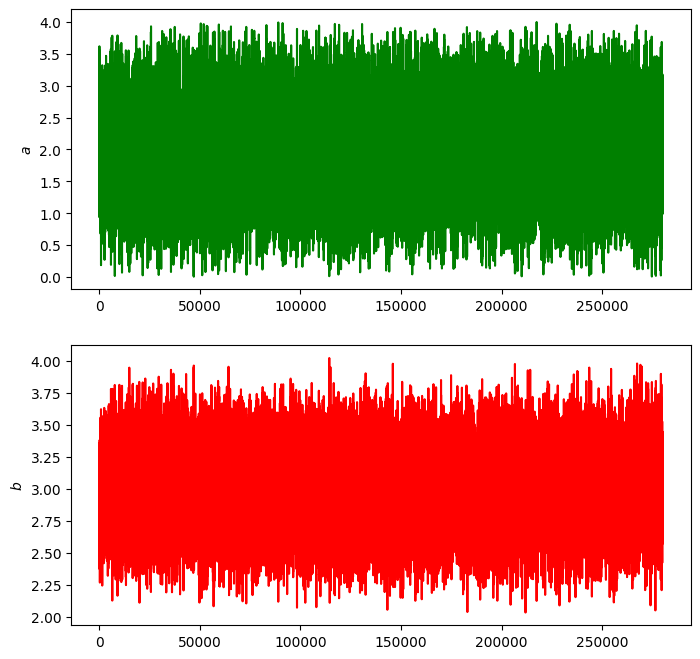

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
samples_b = samples_MH_b.T

# Plot the traceplot of H0
axes[0].plot(samples_b[0], "g")
axes[0].set_ylabel("$a$")

# Plot the traceplot of Om
axes[1].plot(samples_b[1], "r")
axes[1].set_ylabel("$b$")

# Find Best Fit value of parameters

In [ ]:
a_chain=samples_MH_b[:,0]
b_chain=samples_MH_b[:,1]

In [ ]:
#Estimate the mean of a and b chains
a_best = np.mean(a_chain)
b_best = np.mean(b_chain)

#Estimate the Std. Deviation of a and b chains

sig_a = np.std(a_chain)
sig_b = np.std(b_chain)

print("Best fit values:")
print("a:",a_best, "Sig_a:", sig_a)
print("b:",b_best, "Sig_b:", sig_b)

Best fit values:
a: 1.9928721485149765 Sig_a: 0.6351220736366547
b: 3.0030056040878024 Sig_b: 0.26402304437456436


# Show Parameter Histograms

Text(0, 0.5, 'Count')

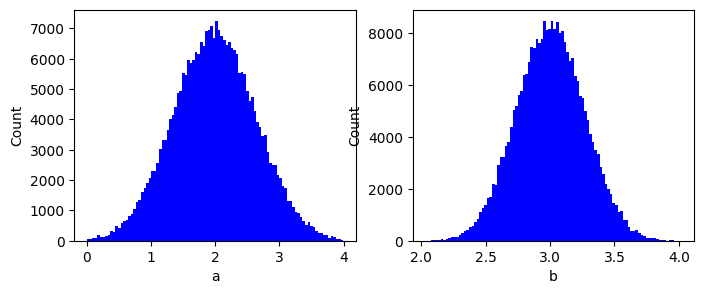

In [ ]:
plt.figure(figsize=(8, 3)) #Plot Size

# Plot the histogram of a
plt.subplot(1, 2, 1)
plt.hist(a_chain, bins=100, color='blue')
plt.xlabel('a')
plt.ylabel('Count')

# Plot the histogram of b
plt.subplot(1, 2, 2)
plt.hist(b_chain, bins=100, color='blue')
plt.xlabel('b')
plt.ylabel('Count')

# Plot Contour

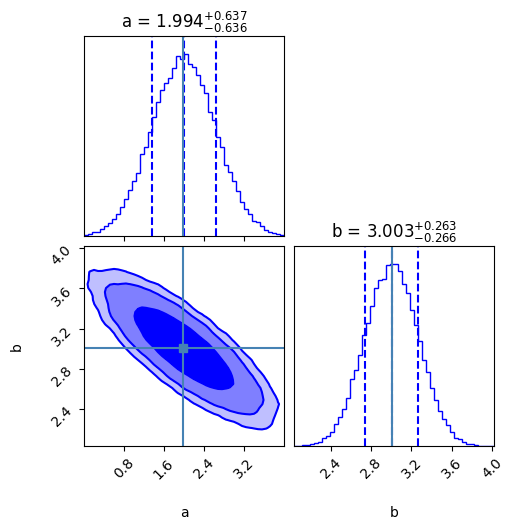

In [ ]:
fig = corner.corner(samples_MH,bins=50,color="b",labels=['a','b'],truths=[a_best,b_best],fill_contours=True,
                    levels=(0.68,0.95,0.99,),
                    smooth=True,
                    quantiles=[0.16, 0.5, 0.84],title_fmt='.3f',plot_datapoints=False,show_titles=True)

In [ ]:
3

3